## Proyecto

In [ ]:
#conda install scikit-learn

In [1]:
## Importando librerías
import pandas as pd
import numpy as np
##from glob import glob

import matplotlib.pyplot as plt
## para hacer gráficos
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
## Ingresando archivos

df = np.load('proyecto_training_data.npy')

##print(df)
data = pd.DataFrame(df,columns = ['SalesPrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

data

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [3]:
# Analizando Data Set
data.describe()

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [4]:
corr_df = data.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalesPrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


### División Dataset

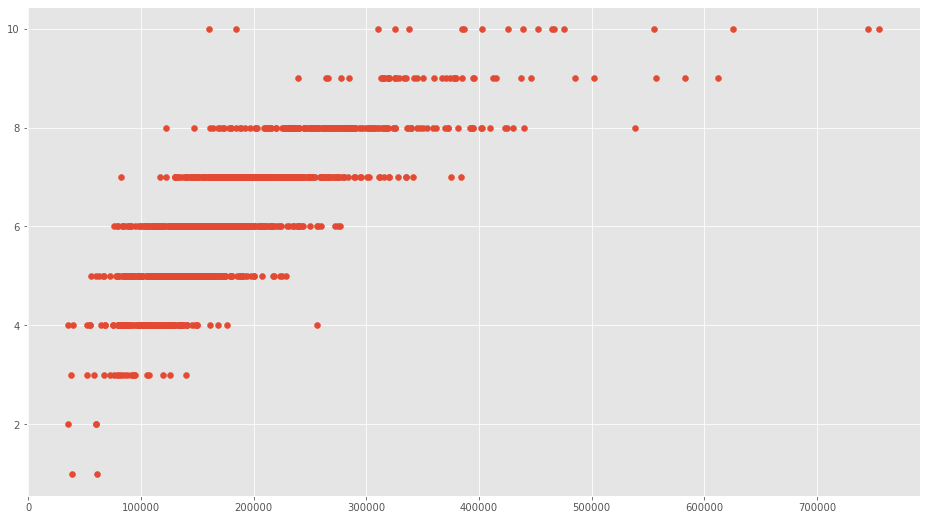

In [5]:
#Seleccion de datos
x = data["SalesPrice"]
y = data["OverallQual"]

plt.scatter(x,y)
plt.show()

In [6]:
## Division de datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,shuffle = True, random_state = 123)

# Visualizando el dataset Train
print(X_train)
print(y_train)

# Visualizando el dataset Test
print(X_test)
print(y_test)

318     260000.0
580     181900.0
961     272000.0
78      136500.0
5       143000.0
          ...   
1041    173000.0
1122    112000.0
1346    262500.0
1406    133000.0
1389    131000.0
Name: SalesPrice, Length: 1168, dtype: float64
318     7.0
580     6.0
961     6.0
78      4.0
5       5.0
       ... 
1041    6.0
1122    4.0
1346    7.0
1406    5.0
1389    6.0
Name: OverallQual, Length: 1168, dtype: float64
147     222500.0
676      87000.0
1304    130000.0
1372    274300.0
1427    140000.0
          ...   
1012    165000.0
1059    220000.0
890     122900.0
628     135000.0
352      95000.0
Name: SalesPrice, Length: 292, dtype: float64
147     7.0
676     4.0
1304    7.0
1372    7.0
1427    5.0
       ... 
1012    6.0
1059    6.0
890     5.0
628     5.0
352     5.0
Name: OverallQual, Length: 292, dtype: float64


In [7]:
# Creando DataSets
dataTest= pd.DataFrame() 
dataTrain= pd.DataFrame() 


dataTrain['x'] = X_train
dataTrain['y'] = y_train
#dataTrain

dataTest['x'] = X_test
dataTest['y'] = y_test
#dataTest

## Analizando DataTrain

In [8]:
dataTrain.describe()

,x,y
count,1168.000000,1168.000000
mean,180717.069349,6.093322
std,79648.006799,1.402296
min,34900.000000,1.000000
25%,129900.000000,5.000000
50%,162000.000000,6.000000
75%,214000.000000,7.000000
max,755000.000000,10.000000


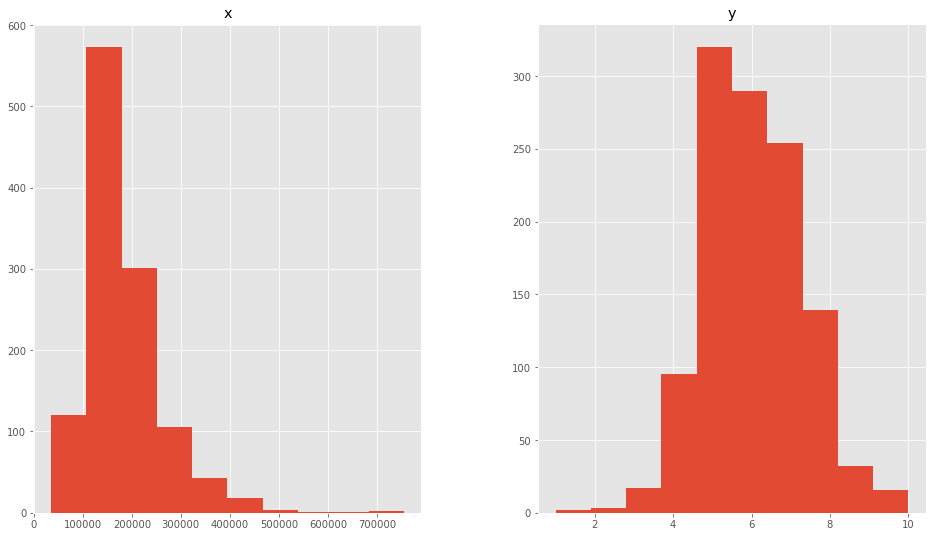

In [9]:
dataTrain.hist()
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


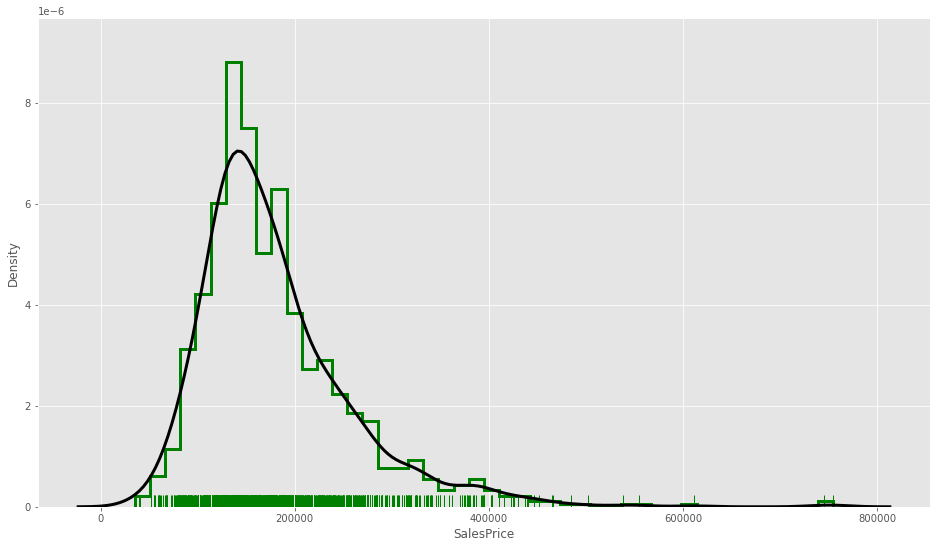

In [10]:
ax = sns.distplot(X_train, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [11]:
xcorr = dataTrain["x"]
ycorr = dataTrain["y"] 
## creando correlacion y covarianza
print(ycorr.corr(xcorr),ycorr.cov(xcorr))

0.7889930770922915 88122.68846694488


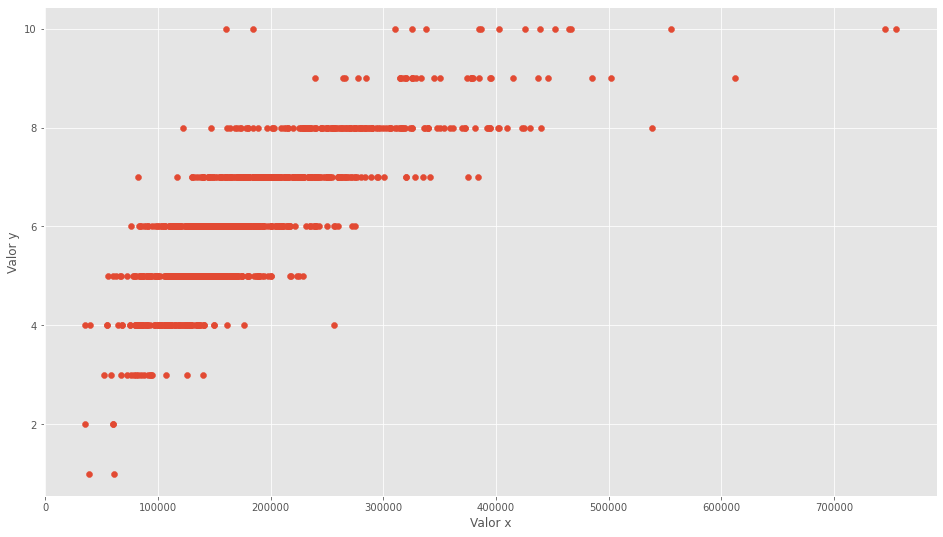

In [12]:
## Graficando Correlacion
x = dataTrain["x"]
y = dataTrain["y"]

plt.scatter(x,y)
plt.xlabel("Valor x")
plt.ylabel("Valor y")
plt.show()

In [13]:
xTrain = dataTrain["x"].values.reshape(-1,1)
yTrain = dataTrain["y"].values.reshape(-1,1)

lm_1 = LinearRegression()
lm_1.fit(xTrain,yTrain)

LinearRegression()

In [14]:
lm_1.coef_

array([[1.38911408e-05]])

In [15]:
lm_1.intercept_

array([3.58295566])

### Regresion: DataTrain

In [16]:
#funcion para calcular nuevos valores
def Calcular(ciclo,betacero,betauno,alfa):
    datatemp = pd.DataFrame(DataPaso[DataPaso['Ciclo']==ciclo])    
    ResultadoError=datatemp['ErrorCuadrado'].sum()/(len(datatemp)*2)
    GradienteBeta1=datatemp['GradienteBeta1'].mean()
    GradienteBeta0=datatemp['Error'].mean()
    nuevoBeta0=betacero-alfa*datatemp['Error'].mean()
    nuevoBeta1=betauno-alfa*datatemp['GradienteBeta1'].mean()    
    return betacero,betauno,alfa,ResultadoError,GradienteBeta1,GradienteBeta0,nuevoBeta0,nuevoBeta1


#### llenado de dataframe (DataTrain)... con valores calculdos en la funcipn

In [19]:
Interacciones = pd.DataFrame(columns=['NumInteraccion', 'Beta0','Beta1','Alfa', 'ResultadoError','GradienteBeta1','GradienteBeta0','nuevoBeta0','nuevoBeta1'])

for i in range(15):
       if Interacciones.empty==True:
            alfa=0.15
            betacero=1
            betauno=1
            DataPaso=pd.DataFrame(columns=['x', 'y','Ciclo','EstimadoY', 'Error','ErrorCuadrado','GradienteBeta1'])
            DataPaso['x']=dataTrain['x']
            DataPaso['y']=dataTrain['y']
            DataPaso['Ciclo']=i
            DataPaso['EstimadoY']=dataTrain['x']*betauno+betacero
            DataPaso['Error']    =dataTrain['y']-DataPaso['EstimadoY']
            DataPaso['ErrorCuadrado']=DataPaso['Error']*DataPaso['Error']
            DataPaso['GradienteBeta1']=(DataPaso['EstimadoY']-dataTrain['y'])*dataTrain['x']
            Interacciones=Interacciones.append(pd.Series([i,
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[0],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[1],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[2],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[3],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[4],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[5],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[6],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[7]
                                                            ],index=['NumInteraccion','Beta0','Beta1','Alfa','ResultadoError','GradienteBeta1','GradienteBeta0','nuevoBeta0','nuevoBeta1']),ignore_index=True)
            
            
           
       else:
            DataPaso=pd.DataFrame(columns=['x', 'y','Ciclo','EstimadoY', 'Error','ErrorCuadrado','GradienteBeta1'])
            betacero=Interacciones.loc[Interacciones.index[-1], 'nuevoBeta0']
            betauno=Interacciones.loc[Interacciones.index[-1], 'nuevoBeta1']
            DataPaso['x']=dataTrain['x']
            DataPaso['y']=dataTrain['y']
            DataPaso['Ciclo']=i
            DataPaso['EstimadoY']=dataTrain['x']*betauno+betacero
            DataPaso['Error']    =dataTrain['y']-DataPaso['EstimadoY']
            DataPaso['ErrorCuadrado']=DataPaso['Error']*DataPaso['Error']
            DataPaso['GradienteBeta1']=(DataPaso['EstimadoY']-dataTrain['y'])*dataTrain['x']
            Interacciones=Interacciones.append(pd.Series([i,
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[0],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[1],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[2],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[3],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[4],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[5],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[6],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[7]
                                                            ],index=['NumInteraccion','Beta0','Beta1','Alfa','ResultadoError','GradienteBeta1','GradienteBeta0','nuevoBeta0','nuevoBeta1']),ignore_index=True)
            


In [20]:
Interacciones

,NumInteraccion,Beta0,Beta1,Alfa,ResultadoError,GradienteBeta1,GradienteBeta0,nuevoBeta0,nuevoBeta1
0,0.0,1.000000e+00,1.000000e+00,0.15,1.949751e+10,3.899602e+10,-1.807120e+05,2.710780e+04,-5.849404e+09
1,1.0,2.710780e+04,-5.849404e+09,0.15,6.671519e+29,-2.281094e+20,1.057087e+15,-1.585631e+14,3.421641e+19
2,2.0,-1.585631e+14,3.421641e+19,0.15,2.282813e+49,1.334338e+30,-6.183489e+24,9.275233e+23,-2.001508e+29
3,3.0,9.275233e+23,-2.001508e+29,0.15,7.811169e+68,-7.805286e+39,3.617066e+34,-5.425599e+33,1.170793e+39
4,4.0,-5.425599e+33,1.170793e+39,0.15,2.672771e+88,4.565745e+49,-2.115823e+44,3.173734e+43,-6.848617e+48
5,5.0,3.173734e+43,-6.848617e+48,0.15,9.145497e+107,-2.670757e+59,1.237662e+54,-1.856493e+53,4.006136e+58
6,6.0,-1.856493e+53,4.006136e+58,0.15,3.129342e+127,1.562274e+69,-7.239772e+63,1.085966e+63,-2.343411e+68
7,7.0,1.085966e+63,-2.343411e+68,0.15,1.070776e+147,-9.138609e+78,4.234944e+73,-6.352416e+72,1.370791e+78
8,8.0,-6.352416e+72,1.370791e+78,0.15,3.663906e+166,5.345679e+88,-2.477254e+83,3.715881e+82,-8.018519e+87
9,9.0,3.715881e+82,-8.018519e+87,0.15,1.253689e+186,-3.126985e+98,1.449083e+93,-2.173625e+92,4.690477e+97


In [21]:
betaTrain= pd.DataFrame() 

df = Interacciones['ResultadoError'] <= min(Interacciones.ResultadoError)
betaTrain=Interacciones.loc[df]
betaTrain

,NumInteraccion,Beta0,Beta1,Alfa,ResultadoError,GradienteBeta1,GradienteBeta0,nuevoBeta0,nuevoBeta1
0,0.0,1.0,1.0,0.15,1.949751e+10,3.899602e+10,-180711.976027,27107.796404,-5.849404e+09


In [22]:
#a= betaTrain['Beta0']
a=max(betaTrain.Beta0)
a
#b= betaTrain['Beta1']
b=max(betaTrain.Beta1)
b

1.0

### Graficando Regresión DataTrain

<function matplotlib.pyplot.show(close=None, block=None)>

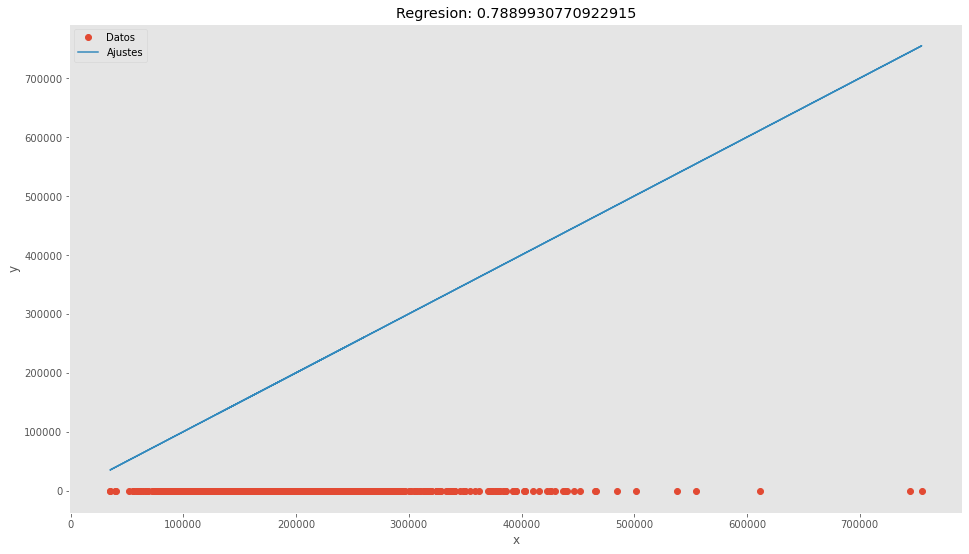

In [23]:
plt.plot(x,y,'o',label='Datos')
plt.plot(x, b*x + a, label='Ajustes')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion Data Train ---- Correlación: '+ str(ycorr.corr(xcorr)))
plt.grid()
plt.legend()
plt.show

Text(0.5, 1.0, 'Analizando Error')

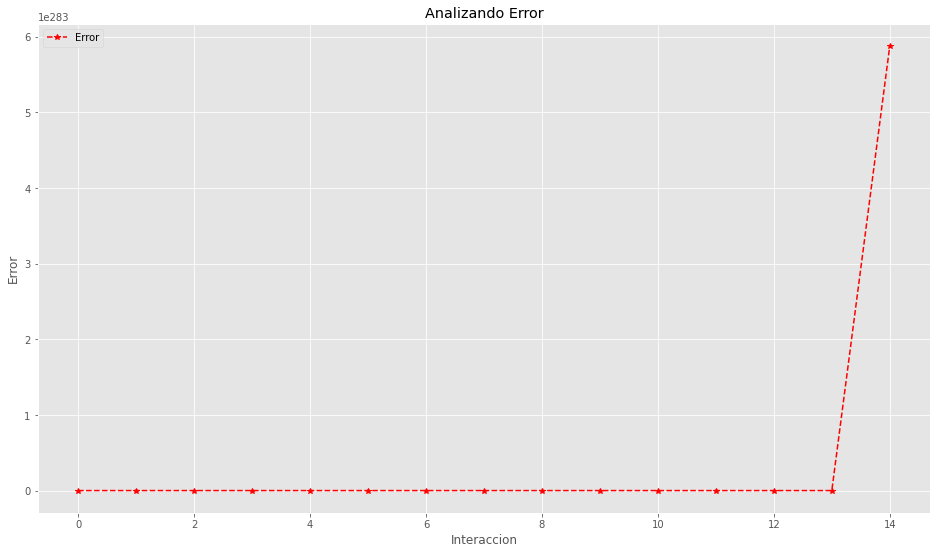

In [25]:
x1 = Interacciones["NumInteraccion"]
y1 = Interacciones["ResultadoError"]
plt.plot(x1, y1, color='r', marker = '*', linestyle = 'dashed', label='Error')
#poner etiqueta al eje x
plt.xlabel('Interaccion')
#poner etiqueta al eje y
plt.ylabel('Error')
#mostrar leyenda
plt.legend()
plt.title('Analizando Error')

## Analizando DataTest

In [26]:
dataTest.describe()

,x,y
count,292.000000,292.000000
mean,181737.702055,6.123288
std,78745.480984,1.304975
min,37900.000000,3.000000
25%,130000.000000,5.000000
50%,165500.000000,6.000000
75%,215000.000000,7.000000
max,625000.000000,10.000000


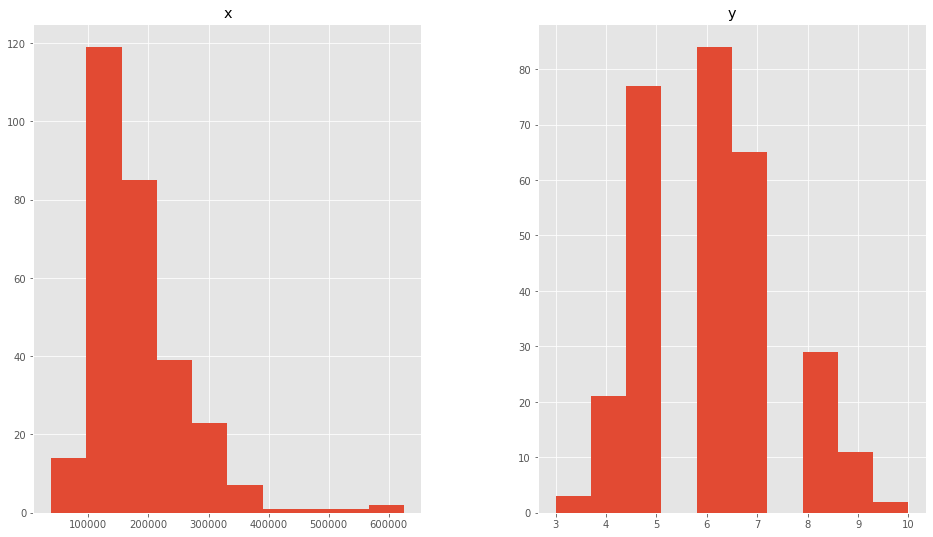

In [27]:
dataTest.hist()
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


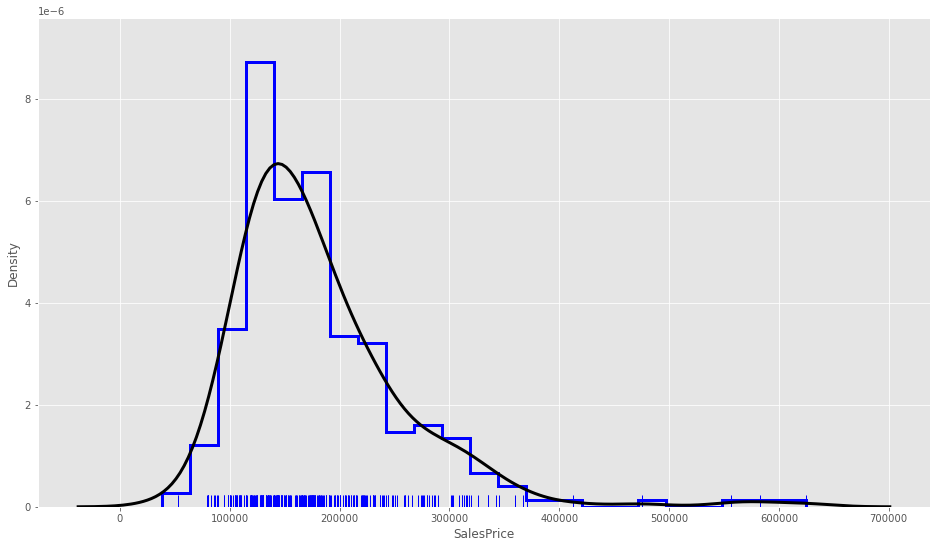

In [28]:
ax = sns.distplot(X_test, rug=True, rug_kws={"color": "b"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "b"})

In [29]:
xcorr = dataTest["x"]
ycorr = dataTest["y"] 
## creando correlacion y covarianza
print(ycorr.corr(xcorr),ycorr.cov(xcorr))

0.8008044334326888 82291.40112036905


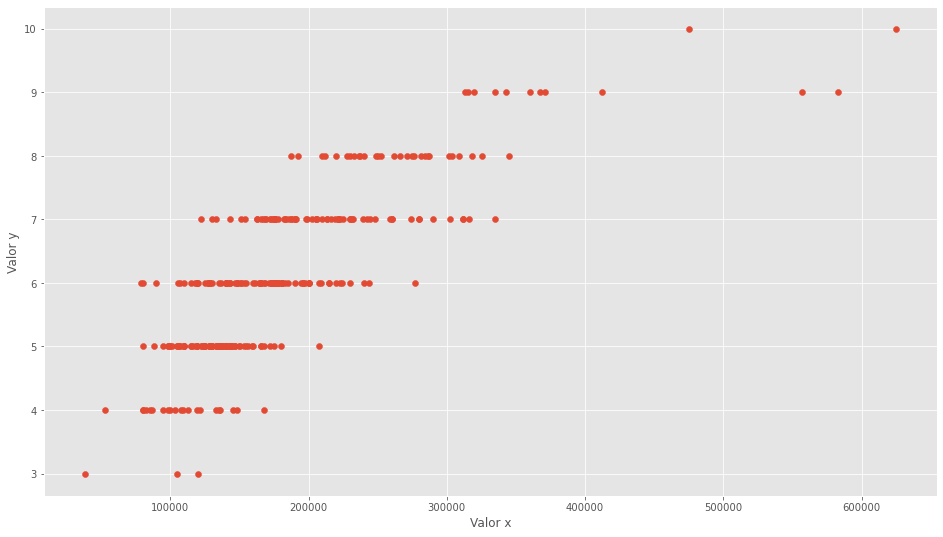

In [30]:
## Graficando Correlacion
x = dataTest["x"]
y = dataTest["y"]

plt.scatter(x,y)
plt.xlabel("Valor x")
plt.ylabel("Valor y")
plt.show()

In [35]:
xTest = dataTest["x"].values.reshape(-1,1)
yTest = dataTest["y"].values.reshape(-1,1)

lm_2 = LinearRegression()
lm_2.fit(xTest,yTest)

LinearRegression()

In [36]:
lm_2.coef_

array([[1.32709856e-05]])

In [37]:
lm_2.intercept_

array([3.71144925])

### Graficando Regresión DataTest

<function matplotlib.pyplot.show(close=None, block=None)>

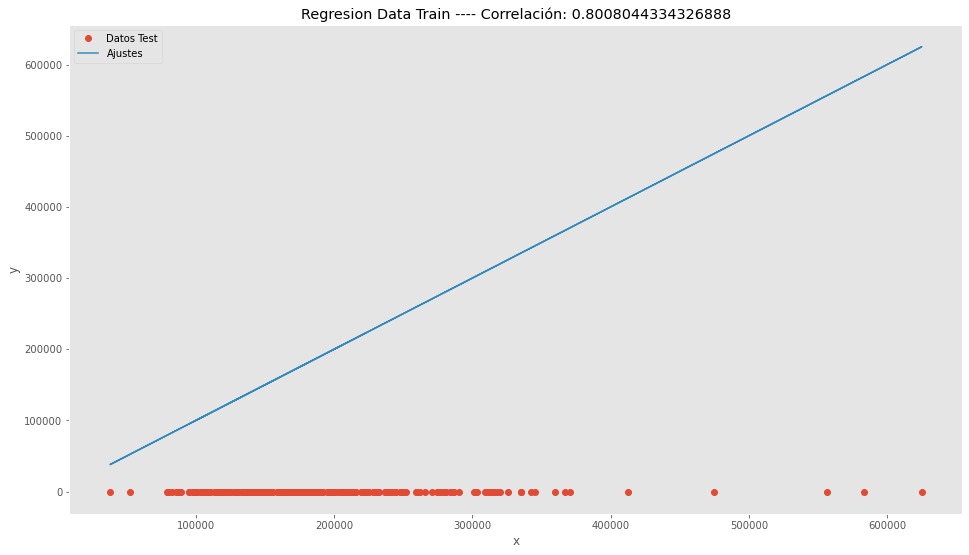

In [39]:
plt.plot(x,y,'o',label='Datos Test')
plt.plot(x, b*x + a, label='Ajustes')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion Data Train ---- Correlación: '+ str(ycorr.corr(xcorr)))
plt.grid()
plt.legend()
plt.show